In [8]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize , poly)

In [9]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [10]:
mendel = pd.read_csv('/Users/sanzhar123/Downloads/respa_mendel.csv', on_bad_lines='skip', sep =';')
mendel

,Имя,Балл теора на респе,Медаль на респе,Балл 1-тура на Менделе,Балл 2-тура на Менделе,Медаль на менделе,Класс,Year,Relative to absolute
0,Bekkhozhin Zhanibek,41.650,gold,52.00,64.30,silver,11,2018,1.000000
1,Galymzhan Moldagulov,37.000,gold,42.00,34.90,bronze,11,2018,0.888355
2,Воробьёв Евгений,38.300,silver,29.15,37.65,bronze,11,2018,0.919568
3,Ashimov Sultan,36.450,gold,34.90,26.75,bronze,11,2018,0.875150
4,Abitayev Zhanibek,23.400,silver,31.00,26.25,bronze,11,2018,0.561825
5,Nurpeisov Olzhas,50.550,gold,35.40,38.20,bronze,10,2018,1.000000
6,Vladislav Cherdantsev,44.200,gold,35.65,45.00,bronze,10,2018,0.874382
7,Kopenov Nurlykhan,49.950,gold,39.75,36.00,bronze,10,2018,0.988131
8,Ababayev Yerslan,41.680,silver,25.00,32.50,pochetka,10,2018,0.824530
9,Vladislav Cherdantsev,46.700,gold,48.20,53.67,silver,11,2019,1.000000


In [11]:
mendel['Суммарный балл на Менделе'] = mendel['Балл 1-тура на Менделе'] + mendel['Балл 2-тура на Менделе']
mendel

,Имя,Балл теора на респе,Медаль на респе,Балл 1-тура на Менделе,Балл 2-тура на Менделе,Медаль на менделе,Класс,Year,Relative to absolute,Суммарный балл на Менделе
0,Bekkhozhin Zhanibek,41.650,gold,52.00,64.30,silver,11,2018,1.000000,116.30
1,Galymzhan Moldagulov,37.000,gold,42.00,34.90,bronze,11,2018,0.888355,76.90
2,Воробьёв Евгений,38.300,silver,29.15,37.65,bronze,11,2018,0.919568,66.80
3,Ashimov Sultan,36.450,gold,34.90,26.75,bronze,11,2018,0.875150,61.65
4,Abitayev Zhanibek,23.400,silver,31.00,26.25,bronze,11,2018,0.561825,57.25
5,Nurpeisov Olzhas,50.550,gold,35.40,38.20,bronze,10,2018,1.000000,73.60
6,Vladislav Cherdantsev,44.200,gold,35.65,45.00,bronze,10,2018,0.874382,80.65
7,Kopenov Nurlykhan,49.950,gold,39.75,36.00,bronze,10,2018,0.988131,75.75
8,Ababayev Yerslan,41.680,silver,25.00,32.50,pochetka,10,2018,0.824530,57.50
9,Vladislav Cherdantsev,46.700,gold,48.20,53.67,silver,11,2019,1.000000,101.87


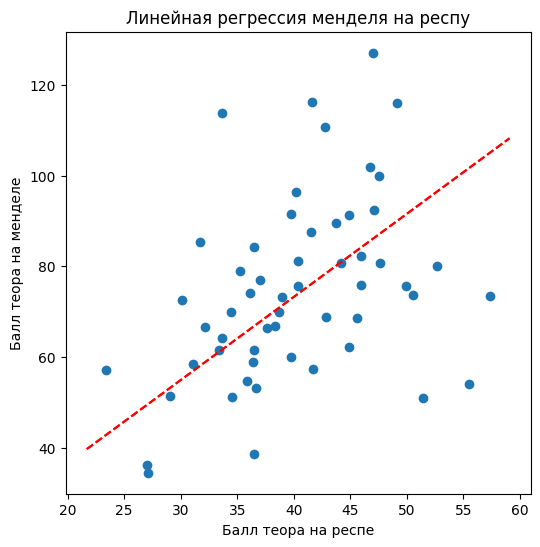

In [12]:
fig, ax = subplots(figsize = (6,6))
ax.scatter(mendel['Балл теора на респе'], mendel['Суммарный балл на Менделе']);

X = MS(['Балл теора на респе'], intercept = False).fit_transform(mendel)
y = mendel['Суммарный балл на Менделе']

model = sm.OLS(y, X)
results = model.fit()

abline(ax, (0,0), results.params.iloc[0], 'r--')

ax.set_xlabel('Балл теора на респе')
ax.set_ylabel('Балл теора на менделе')
ax.set_title('Линейная регрессия менделя на респу')
summarize(results)
fig.savefig('LinearGraph.pdf', dpi = 400);

Text(0.5, 1.0, 'Fitted value vs Residual Error')

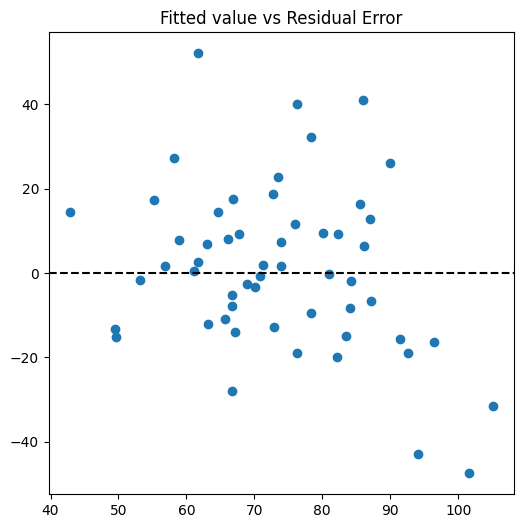

In [13]:
fig, ax2 = subplots(figsize = (6,6))
ax2.scatter(results.fittedvalues, results.resid);
ax2.axhline(0, c = 'black', ls ='--')
ax2.set_title('Fitted value vs Residual Error')

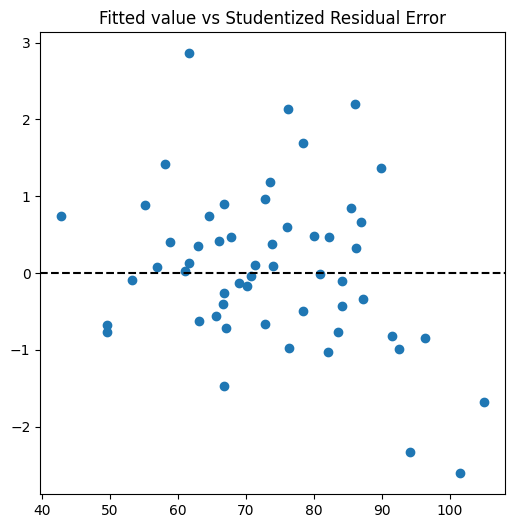

In [14]:
fig, ax2 = subplots(figsize = (6,6))
studresid = results.outlier_test()

ax2.scatter(results.fittedvalues, studresid['student_resid']);
ax2.axhline(0, c = 'black', ls ='--')
ax2.set_title('Fitted value vs Studentized Residual Error');

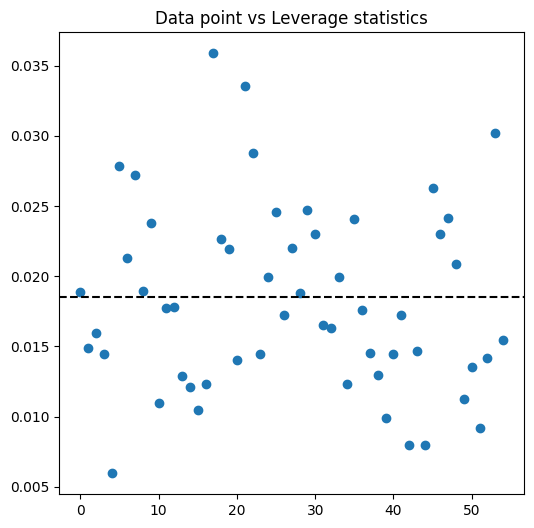

In [15]:
infl = results.get_influence()
fig, ax = subplots(figsize=(6,6))
ax.scatter(np.arange(mendel.shape[0]), infl.hat_matrix_diag)
ax.axhline(1/54, c = 'black', ls = '--')
ax.set_title('Data point vs Leverage statistics');

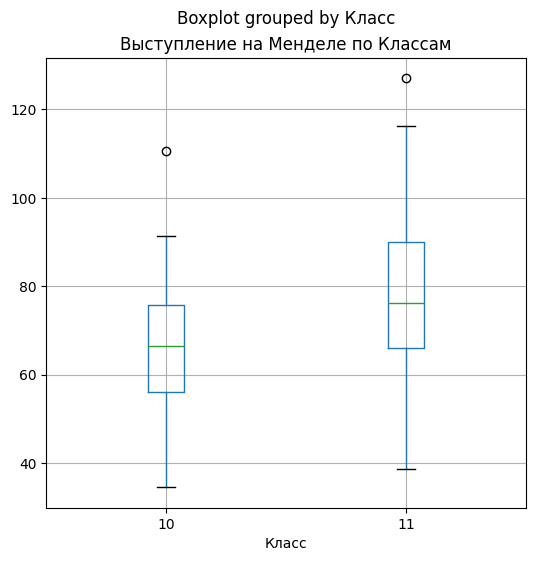

In [16]:
fig4, ax = subplots(figsize = (6,6))
mendel.boxplot('Суммарный балл на Менделе', by = 'Класс', ax = ax);
ax.set_title("Выступление на Менделе по Классам");
fig4.savefig('Boxplot.pdf', dpi = 400)